In [23]:
import pandas as pd


In [24]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

#shapes
train.shape, test.shape, sample_submission.shape

((20758, 18), (13840, 17), (13840, 2))

In [25]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [27]:
sample_submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


<Axes: >

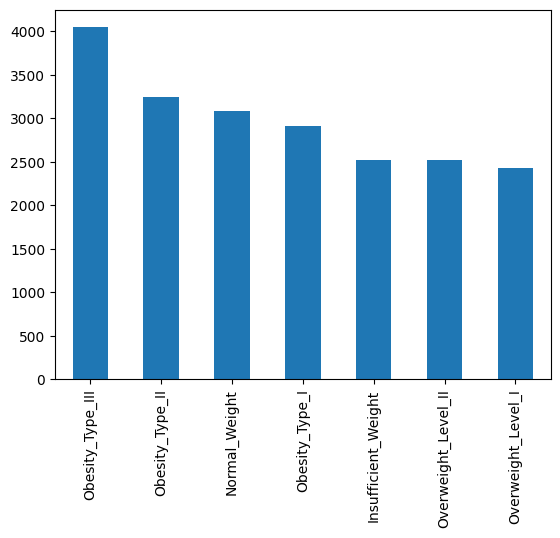

In [50]:
#count of target NObeyesdad
train['NObeyesdad'].value_counts()

#plot histogram of target
import matplotlib.pyplot as plt
train['NObeyesdad'].value_counts().plot(kind='bar')

In [28]:
#drop id column
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)



In [29]:
#check null values
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [30]:
#check categorical columns
train.select_dtypes(include='object').columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [31]:
#unique target values
train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [32]:
#unique values in categorical columns
for col in train.select_dtypes(include='object').columns:
    print(col, train[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [33]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=train.drop('NObeyesdad', axis=1)
y=train['NObeyesdad']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#one hot encoding
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)


In [35]:
#using logistic regression for multi-class classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le=LabelEncoder()

y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

model=LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)


/Users/krishan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8374277456647399

In [36]:


model=RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)




0.8872832369942196

In [37]:
# #hyperparameter tuning using grid search on random forest
# from sklearn.model_selection import GridSearchCV

# param_grid={'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[10,15]}

# model=RandomForestClassifier(random_state=42)

# grid=GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# grid.fit(X_train, y_train)

# grid.best_params_

# grid.best_score_


In [38]:
#gbm
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9039017341040463

In [56]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625


0.9046242774566474

In [44]:
#predict on test data

#one hot encoding
test=pd.get_dummies(test)

#drop CALC_Always
test.drop('CALC_Always', axis=1, inplace=True)

#predict
y_pred=model.predict(test)

#inverse transform

y_pred=le.inverse_transform(y_pred)

#save to csv

sample_submission['NObeyesdad']=y_pred

sample_submission.to_csv('submission.csv', index=False)

sample_submission.head()




,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [47]:
#unique in target sample submission
sample_submission['NObeyesdad'].unique()

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III',
       'Obesity_Type_I', 'Insufficient_Weight', 'Normal_Weight',
       'Overweight_Level_II'], dtype=object)

In [43]:
#columns of train and test
X_train.columns, test.columns

(Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
        'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
        'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
        'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Frequently',
        'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
        'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
       dtype='object'),
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
        'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
        'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
        'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
        'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
        'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
        'MTRANS_Bike', 'MTR

In [20]:
# creating stack model using lightgbm and random forest
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=100, random_state=42)), ('lgb', lgb.LGBMClassifier(n_estimators=100, random_state=42))]
model=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 30
[LightGBM] [Info] Start training from score -2.117117
[LightGBM] [Info] Start training from score -1.911230
[LightGBM] [Info] Start training from score -1.948141
[LightGBM] [Info] Start training from score -1.857720
[LightGBM] [Info] Start training from score -1.633574
[LightGBM] [Info] Start training from score -2.145531
[LightGBM] [Info] Start training from score -2.112625
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM

/Users/krishan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9046242774566474